In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
data = pd.read_csv(url)
print(data.head(2))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa


In [ ]:
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [ ]:
y = data['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
data.shape

(150, 5)

In [ ]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [ ]:
sqrt(data.shape[0])

12.24744871391589

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred =clf.predict(X_test)
pred

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor'],
      dtype=object)

In [ ]:
accuracy_score(y_test,pred)

0.9666666666666667

<Axes: >

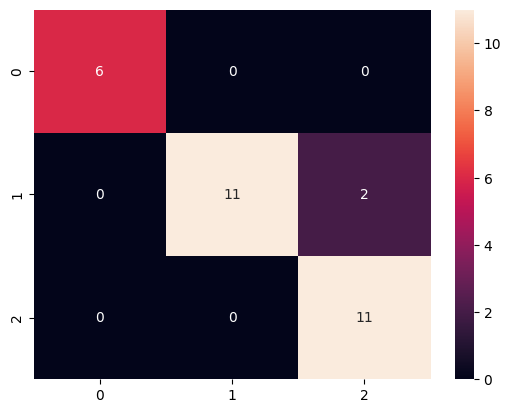

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [ ]:
##### error method, also called as elbow method
error = []
for i in range(1,31):  ##### considering k value from 1 to 30
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    predict_i = clf.predict(X_test)
    error.append(1 - accuracy_score(y_test, predict_i))

In [ ]:
error

[0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.09999999999999998,
 0.06666666666666665,
 0.09999999999999998,
 0.06666666666666665,
 0.09999999999999998,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.1333333333333333,
 0.09999999999999998,
 0.1333333333333333,
 0.09999999999999998,
 0.1333333333333333,
 0.09999999999999998,
 0.09999999999999998,
 0.1333333333333333,
 0.09999999999999998,
 0.1333333333333333,
 0.16666666666666663,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.09999999999999998,
 0.09999999999999998]

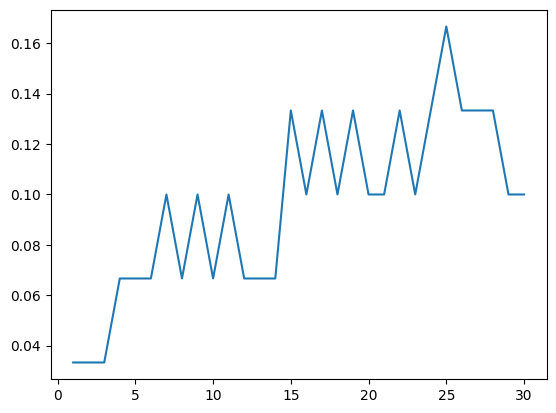

In [ ]:
plt.plot(range(1,31), error)

<Axes: >

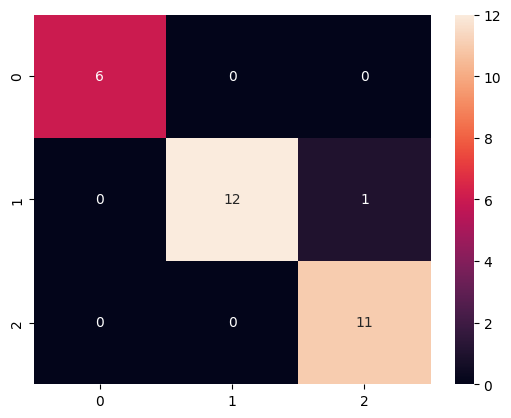

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)